# Neural Network classification with PyTorch

## 1. Make classification data and get it ready

In [1]:
import sklearn
import pandas as pd
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

len(X), len(y)

(1000, 1000)

In [3]:
# Make DataFrame of circle data
circles  = pd.DataFrame({'X1': X[:, 0], 
                         'X2':X[:, 1], 
                         'label':y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


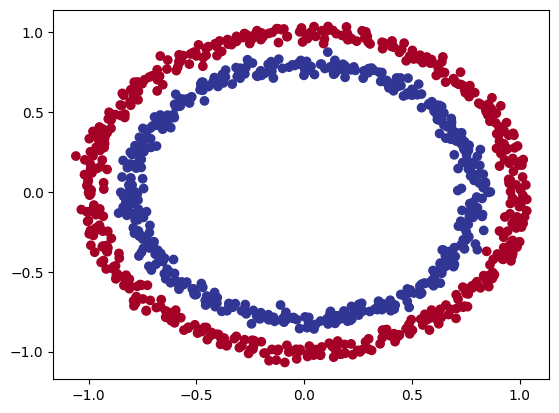

In [4]:
# Visualize

plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the first example of features and labels
X_sample = X[:10]
y_sample = y[:10]

X_sample, y_sample

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

### 1.2 Turn data into the tensors and create train and test splits

In [7]:
import torch
from sklearn.model_selection import train_test_split

In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
torch.float

torch.float32

In [10]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
X.dtype

torch.float32

In [12]:
y.dtype

torch.float32

In [13]:
X_sample = X[:10]
y_sample = y[:10]

X_sample, y_sample

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [14]:
X.shape

torch.Size([1000, 2])

In [15]:
# 0.2 is 20 % of data will be tested & 80 % of data will be trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
len(X_train), len(X_test)

(800, 200)

In [17]:
X_train.dtype

torch.float32

## 2. Building a model
1. Setup device agnostic code so our code will run on an accelerator (GPU) if ther is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss funciton and optimizer
4. Create a training and testing loop

In [18]:
from torch import nn

In [19]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [20]:
input = torch.rand(1, 4) # 4 features
linear_layer = torch.rand(6, 4) # linear layer for 4 features data
bias = torch.rand(1)

In [21]:
input @ linear_layer.T + bias

tensor([[0.9930, 1.8140, 1.7306, 1.2778, 0.9926, 1.5191]])

In [22]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Crate 2 nn.Linear layers
        # takes in 2 features and upscales to 5 features
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        # takes in 5 featues form previous layers and outputs a single feature (same shape as y)
        self.layer2 = nn.Linear(in_features=5, out_features=1)
        
    # 3. Define a forward() method
    def forward(self, X):
        output_from_layer1 = self.layer1(X)
        output_from_layer2 = self.layer2(output_from_layer1)
        return output_from_layer2

In [23]:
# 4. Instantiate an instance of our model class and send it to the target device
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.parameters()

<generator object Module.parameters at 0x000001E3DBBCC2E0>

In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [26]:
# Let's replicate the model above using nn.Sequentila()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

## 3.Train model

In [28]:
# Calculate accuracy - out of 100 example what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [29]:
# Set up the loss function
# BCEWithLogitsLoss = sigmoid activateion function built-in.
loss_fn = nn.BCEWithLogitsLoss()

In [30]:
# Set up the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()
    
    #1. Forward pass
    logits = model_0(X_train).squeeze()
    y_predictions = torch.round(torch.sigmoid(logits))
    
    #2. Calculate loss/accuracy
    # nn.BCEWithLogitsLoss expects raw logits as input
    loss = loss_fn(logits, y_train)
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_predictions)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward (backpropagation)
    loss.backward()
    
    #5. Optimizer step (gradient descent)
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_0(X_test).squeeze()
        y_test_predictions = torch.round(torch.sigmoid(test_logits))
        
        #2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=y_test_predictions)
        
    #Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}%")

Epoch: 0 | Loss: 0.69605 | Acc: 49.62% | Test loss: 0.69587 | Test acc: 51.50000%
Epoch: 10 | Loss: 0.69398 | Acc: 47.00% | Test loss: 0.69585 | Test acc: 43.00000%
Epoch: 20 | Loss: 0.69326 | Acc: 48.12% | Test loss: 0.69624 | Test acc: 45.00000%
Epoch: 30 | Loss: 0.69300 | Acc: 50.00% | Test loss: 0.69658 | Test acc: 45.50000%
Epoch: 40 | Loss: 0.69290 | Acc: 50.75% | Test loss: 0.69681 | Test acc: 45.50000%
Epoch: 50 | Loss: 0.69287 | Acc: 50.62% | Test loss: 0.69693 | Test acc: 47.50000%
Epoch: 60 | Loss: 0.69285 | Acc: 51.00% | Test loss: 0.69697 | Test acc: 47.50000%
Epoch: 70 | Loss: 0.69284 | Acc: 51.00% | Test loss: 0.69698 | Test acc: 47.00000%
Epoch: 80 | Loss: 0.69284 | Acc: 51.00% | Test loss: 0.69695 | Test acc: 47.50000%
Epoch: 90 | Loss: 0.69283 | Acc: 51.50% | Test loss: 0.69692 | Test acc: 47.50000%


## 4. Make predictions and evalueate the model

In [36]:
import sys
sys.path.append(r"C:\Users\winai\All Data\My AI Code\Training Day 4")
from helper_functions import plot_predictions, plot_decision_boundary

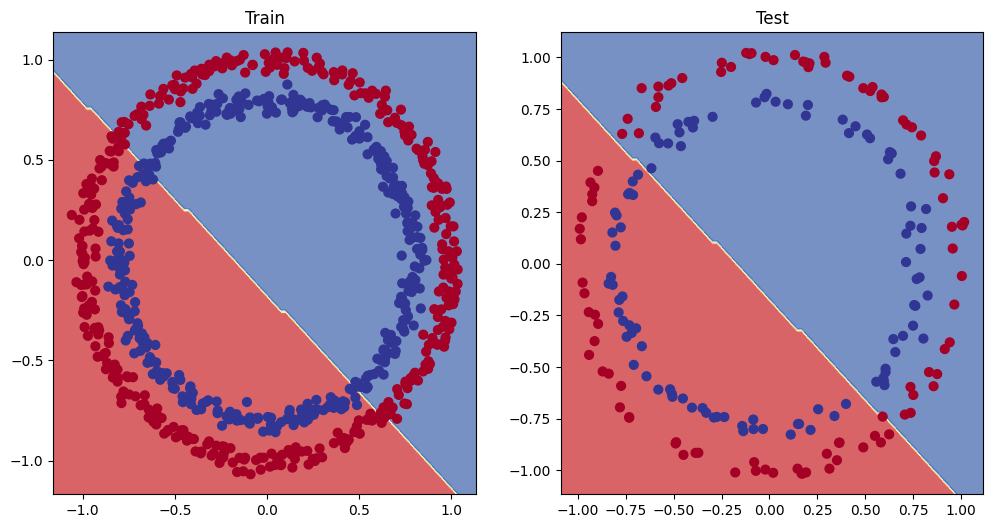

In [37]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Exercise
Let's try and improve our model by:

- Adding more hidden units: 5 => 10
- Increase the number of layers: 2 => 3
- Increase the number of epochs: 100 => 100000

In [38]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
       
        self.layer_1 = nn.Linear(in_features=2, out_features=10) 
        self.layer_2 = nn.Linear(in_features=10, out_features=10) 
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, X):
        X = self.layer_1(X)
        X = self.layer_2(X)
        X = self.layer_3(X)
        return X
    
torch.manual_seed(42)
torch.cuda.manual_seed(42)    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [40]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()
    
    #1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward (backpropagation)
    loss.backward()
    
    #5. Optimizer step (gradient descent)
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    #Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}%")

Epoch: 0 | Loss: 0.69419 | Acc: 50.12% | Test loss: 0.69169 | Test acc: 53.50000%
Epoch: 100 | Loss: 0.69291 | Acc: 52.38% | Test loss: 0.69461 | Test acc: 48.50000%
Epoch: 200 | Loss: 0.69282 | Acc: 51.25% | Test loss: 0.69571 | Test acc: 47.50000%
Epoch: 300 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69605 | Test acc: 47.50000%
Epoch: 400 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69615 | Test acc: 47.50000%
Epoch: 500 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69618 | Test acc: 47.50000%
Epoch: 600 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69619 | Test acc: 47.50000%
Epoch: 700 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69620 | Test acc: 47.50000%
Epoch: 800 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69620 | Test acc: 47.50000%
Epoch: 900 | Loss: 0.69281 | Acc: 51.62% | Test loss: 0.69620 | Test acc: 47.50000%


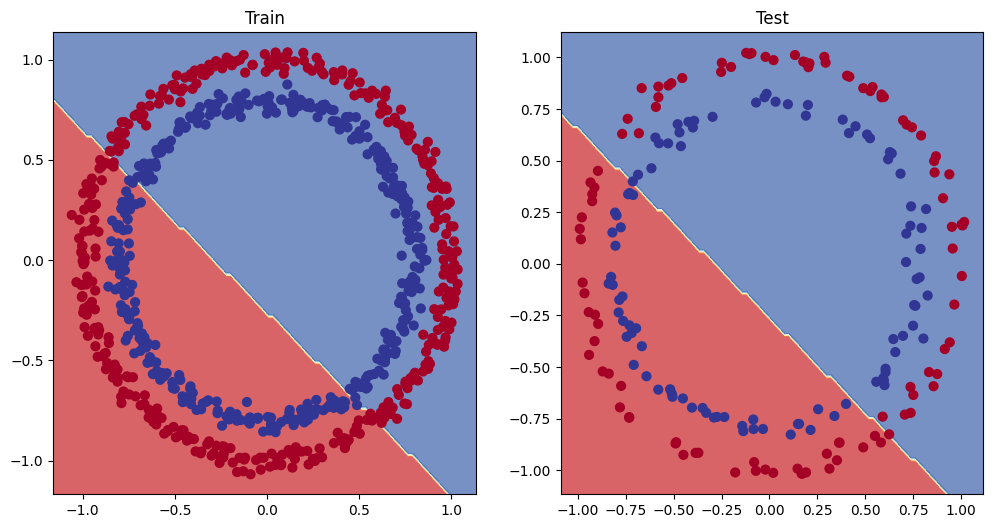

In [41]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 6. Building a model with non-linearity

In [42]:
# Build a model with non-linear activation functions
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
       
        self.layer_1 = nn.Linear(in_features=2, out_features=10) 
        self.layer_2 = nn.Linear(in_features=10, out_features=10) 
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.layer_1(X)
        X = self.relu(X)
        X = self.layer_2(X)
        X = self.relu(X)
        X = self.layer_3(X)
        return X
    
torch.manual_seed(42)
torch.cuda.manual_seed(42)    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
# Set up loss and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr = 0.1)

In [44]:
# Write a training and evaluation loop for model_3
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1500

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_3.train()
    
    #1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward (backpropagation)
    loss.backward()
    
    #5. Optimizer step (gradient descent)
    optimizer.step()
    
    ### Testing
    model_3.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    #Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}%")

Epoch: 0 | Loss: 0.69282 | Acc: 50.38% | Test loss: 0.69368 | Test acc: 48.50000%
Epoch: 100 | Loss: 0.69121 | Acc: 75.12% | Test loss: 0.69130 | Test acc: 76.00000%
Epoch: 200 | Loss: 0.68994 | Acc: 61.12% | Test loss: 0.68953 | Test acc: 65.50000%
Epoch: 300 | Loss: 0.68826 | Acc: 56.88% | Test loss: 0.68726 | Test acc: 61.50000%
Epoch: 400 | Loss: 0.68585 | Acc: 55.25% | Test loss: 0.68417 | Test acc: 59.00000%
Epoch: 500 | Loss: 0.68205 | Acc: 53.75% | Test loss: 0.67951 | Test acc: 57.50000%
Epoch: 600 | Loss: 0.67666 | Acc: 54.12% | Test loss: 0.67321 | Test acc: 57.50000%
Epoch: 700 | Loss: 0.66771 | Acc: 65.75% | Test loss: 0.66445 | Test acc: 64.50000%
Epoch: 800 | Loss: 0.65405 | Acc: 69.25% | Test loss: 0.65188 | Test acc: 69.50000%
Epoch: 900 | Loss: 0.62935 | Acc: 71.88% | Test loss: 0.63062 | Test acc: 70.50000%
Epoch: 1000 | Loss: 0.58132 | Acc: 82.00% | Test loss: 0.58650 | Test acc: 81.50000%
Epoch: 1100 | Loss: 0.50233 | Acc: 91.00% | Test loss: 0.50573 | Test acc: 88

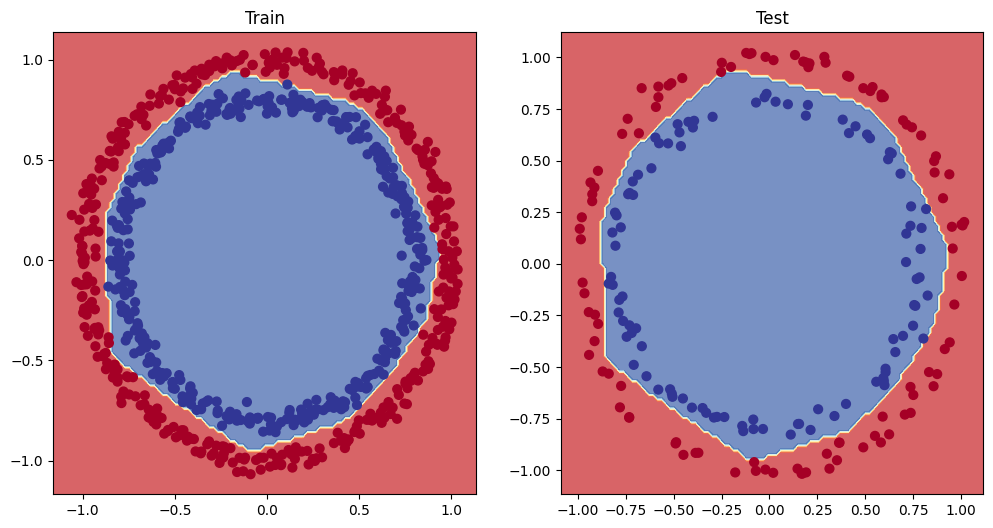

In [45]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)